In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:

image1=cv2.imread('obj1_5.JPG')
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


## SIFT with default features

In [27]:
sift = cv2.xfeatures2d.SIFT_create()	
kp, des = sift.detectAndCompute(image1_gray,None)
keypoints_without_size = np.copy(image1)
keypoints_with_size = np.copy(image1)
cv2.drawKeypoints(image1, kp, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image1, kp, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (0, 255, 0))
cv2.imwrite('Results/22a_sift_default_keypoints_without_size.jpg',keypoints_without_size)
cv2.imwrite('Results/22a_sift_default_keypoints_with_size.jpg',keypoints_with_size)

True

## SIFT with adjusted threshold

In [28]:
sift = cv2.xfeatures2d.SIFT_create(
nfeatures = 0,
nOctaveLayers = 3,
contrastThreshold = 0.18,
edgeThreshold = 10,
sigma = 1.6 
)	

kp, des = sift.detectAndCompute(image1_gray,None)

keypoints_without_size = np.copy(image1)
keypoints_with_size = np.copy(image1)
cv2.drawKeypoints(image1, kp, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image1, kp, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (0, 255, 0))
cv2.imwrite('Results/22a_sift_keypoints_without_size.jpg',keypoints_without_size)
cv2.imwrite('Results/22a_sift_keypoints_with_size.jpg',keypoints_with_size)

True

## SURF with default features

In [30]:
surf = cv2.xfeatures2d.SURF_create()	
kp, des = surf.detectAndCompute(image1_gray,None)
keypoints_without_size = np.copy(image1)
keypoints_with_size = np.copy(image1)
cv2.drawKeypoints(image1, kp, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image1, kp, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (0, 255, 0))
cv2.imwrite('Results/22a_surf_default_keypoints_without_size.jpg',keypoints_without_size)
cv2.imwrite('Results/22a_surf_default_keypoints_with_size.jpg',keypoints_with_size)

True

## SURF with adjusted threshold

In [31]:
surf = cv2.xfeatures2d.SURF_create(3000)	
kp, des = sift.detectAndCompute(image1_gray,None)
keypoints_without_size = np.copy(image1)
keypoints_with_size = np.copy(image1)
cv2.drawKeypoints(image1, kp, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image1, kp, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (0, 255, 0))
cv2.imwrite('Results/22a_surf_keypoints_without_size.jpg',keypoints_without_size)
cv2.imwrite('Results/22a_surf_keypoints_with_size.jpg',keypoints_with_size)

True

## top 1000 features SIFT

In [32]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 1000)	
kp, des = sift.detectAndCompute(image1_gray,None)
keypoints_without_size = np.copy(image1)
keypoints_with_size = np.copy(image1)
cv2.drawKeypoints(image1, kp, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(image1, kp, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (0, 255, 0))
cv2.imwrite('Results/22a_sift_best_keypoints_without_size.jpg',keypoints_without_size)
cv2.imwrite('Results/22a_sift_best_keypoints_with_size.jpg',keypoints_with_size)

True

In [46]:
import imutils
# training_img = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
for angle in np.arange(0, 30, 15):
    rotated = imutils.rotate_bound(image1, angle)
    # cv2.imshow("Rotated (Correct)", rotated)
    # cv2.waitKey(0)
    

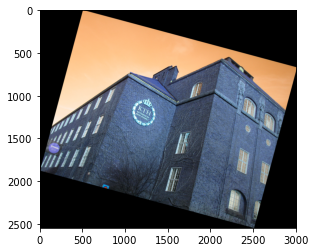

In [47]:
plt.imshow(rotated)

In [49]:

rotated_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create(
nfeatures = 0,
nOctaveLayers = 3,
contrastThreshold = 0.18,
edgeThreshold = 10,
sigma = 1.6 
)	

kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(rotated_gray,None)

# keypoints_without_size = np.copy(rotated)
# keypoints_with_size = np.copy(rotated)
# cv2.drawKeypoints(rotated, kp, keypoints_without_size, color = (0, 255, 0))
# cv2.drawKeypoints(rotated, kp, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color = (0, 255, 0))
# cv2.imwrite('Results/rot_sift_keypoints_without_size.jpg',keypoints_without_size)
# cv2.imwrite('Results/rot_sift_keypoints_with_size.jpg',keypoints_with_size)

In [72]:
des2.shape

(369, 128)

In [75]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)


# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(des1, des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [81]:
matches[0].trainIdx

0

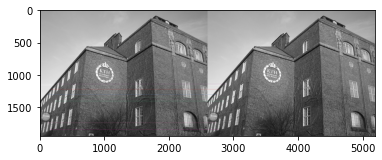

(<matplotlib.image.AxesImage at 0x7f207e28b750>, None)

In [77]:
img3 = cv2.drawMatches(image1_gray,kp1,rotated_gray,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()